# Initial Evalulation of the LIDAR Collection For Every County


In [9]:
%matplotlib inline 
import os
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import geopandas as gpd

In [17]:
lidar_path = '../lidar'
counties = sorted([c for c in os.listdir(lidar_path)])

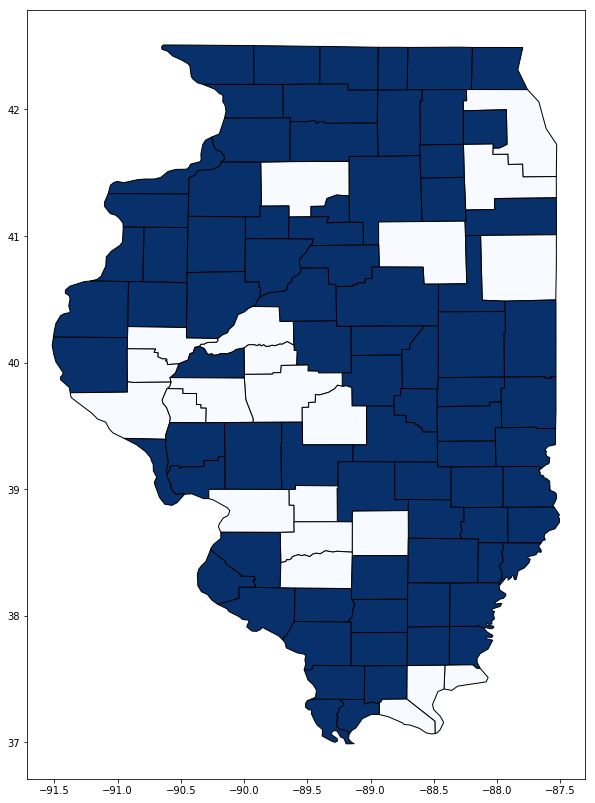

LAS collection available for 80 out of 102 Illinois counties.
Missing counties include Bond, Brown, Bureau, Christian, Clinton, Cook, Hardin, Iroquois, Livingston, Madison, Marion, Mason, Massac, Menard, Morgan, Pike, Pope, Sangamon, Schuyler, Scott, Washington, Will


In [40]:
IL_Counties = '../examples/IL_Counties.gpkg'
IL = gpd.read_file('../examples/IL_Counties.gpkg')
IL['name'] = IL['NAME'].apply(lambda x: x.lower().replace(' ', '').replace('.', ''))
IL['available'] = IL['name'].apply(lambda x: x in counties)
IL.plot(figsize=(10,30), column='available',  cmap='Blues', edgecolor='black')
plt.show()
print(f'LAS collection available for {len(counties)} out of {len(IL)} Illinois counties.')
missing = sorted(IL.loc[IL['available']==False, 'NAME'].values)
print(f'Missing counties include {", ".join(missing)}' )

### Initial LAS Tile Index Creation
The initial LAS tile index was created using the PDAL command line utility. PDAL provides a minimal index that includes the file location, the native LAS file projection,
the collection date, and a geometry representing the boundary of the LAS file. A LAS tile index was built for each county using the following command:
```bash
find ${county} -name \*.las | pdal tindex --fast_boundary --lyr_name=tindex -f GPKG --stdin tiles.gpkg
```
Notes:
* PDAL will write the index in any format supported by GDAL. Rather than shapefiles, the single file GeoPackage format has choosen for tile indices.
* PDAL creates an absolute file path to the LAS file rather than a relative path. A relative path is created in later processing 
* If the LAS files does not have projection information, PDAL sets the srs field to EPSG:4326 and does NOT project the geometry.
* Some county collections already contained a tile index. This was ignored in favor of the newly created index for consistency. 

### LAS Tile Index Review
Basic information about each counties' LIDAR collection

Adams
Index contains 6426 LAS files.
Bounds (geographic coordinates) = [ -9.15148469e+01   3.97485549e+01   2.08999999e+06   1.23599999e+06]
Native Projections = ['EPSG:26972' 'EPSG:4326']


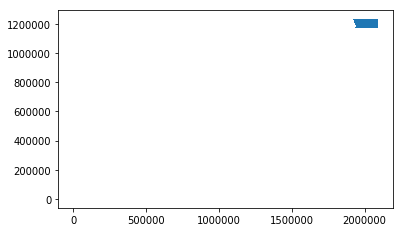

Alexander
Index contains 223 LAS files.
Bounds (geographic coordinates) = [  808000.     4098000.      844833.512  4139999.999]
Native Projections = ['EPSG:4326']


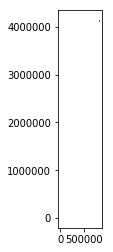

Boone
Index contains 2112 LAS files.
Bounds (geographic coordinates) = [-88.9460974   42.14769229 -88.69932765  42.49995826]
Native Projections = ['EPSG:6455']


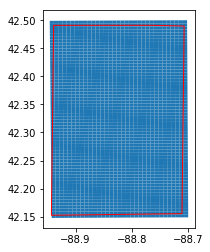

Calhoun
Index contains 235 LAS files.
Bounds (geographic coordinates) = [  677651.789  4304907.104   722000.     4364000.   ]
Native Projections = ['EPSG:4326']


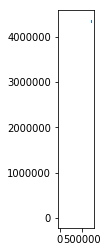

Carroll
Index contains 3626 LAS files.
Bounds (geographic coordinates) = [-90.33121461  41.92067373 -89.67421833  42.20712433]
Native Projections = ['EPSG:3444']


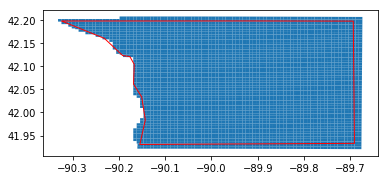

Cass
Index contains 2954 LAS files.
Bounds (geographic coordinates) = [-90.58927766  39.86781837 -89.9899586   40.13197965]
Native Projections = ['EPSG:6457']


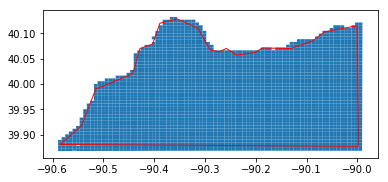

Champaign
Index contains 7248 LAS files.
Bounds (geographic coordinates) = [-88.47379021  39.8684226  -87.92377642  40.40640199]
Native Projections = ['EPSG:3443']


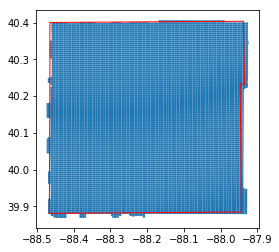

Clark
Index contains 3864 LAS files.
Bounds (geographic coordinates) = [-88.02353733  39.14697147 -87.52647007  39.48921018]
Native Projections = ['EPSG:3443']


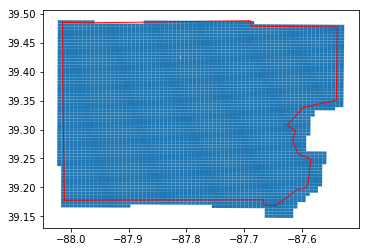

Clay
Index contains 3628 LAS files.
Bounds (geographic coordinates) = [-88.70678753  38.58902836 -88.23622768  38.92396732]
Native Projections = ['EPSG:3443']


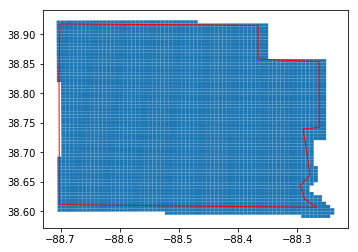

Coles
Index contains 3994 LAS files.
Bounds (geographic coordinates) = [-88.49050363  39.3577663  -87.94450172  39.68697976]
Native Projections = ['EPSG:3443']


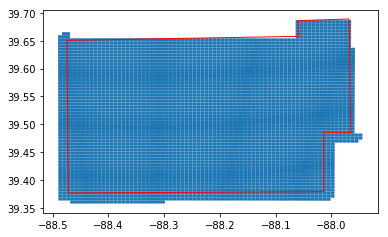

Crawford
Index contains 3512 LAS files.
Bounds (geographic coordinates) = [-87.9608312   38.8399694  -87.50422508  39.18683168]
Native Projections = ['EPSG:3443']


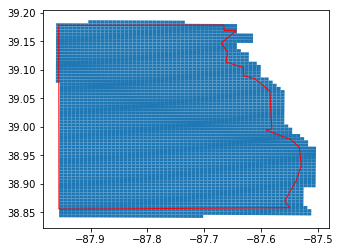

Cumberland
Index contains 2734 LAS files.
Bounds (geographic coordinates) = [-88.48281025  39.1601426  -87.99526794  39.38529627]
Native Projections = ['EPSG:3443']


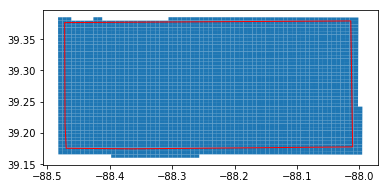

DeKalb
Index contains 4654 LAS files.
Bounds (geographic coordinates) = [-88.94320331  41.62737443 -88.58723726  42.15454049]
Native Projections = ['EPSG:6455']


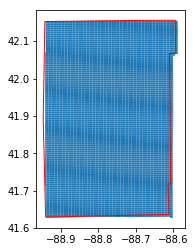

De Witt
Index contains 3098 LAS files.
Bounds (geographic coordinates) = [-89.15867342  40.0467932  -88.56357592  40.29099956]
Native Projections = ['EPSG:3443']


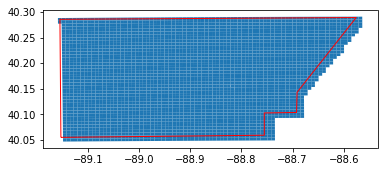

Douglas
Index contains 3183 LAS files.
Bounds (geographic coordinates) = [-88.48370979  39.64851195 -87.92796149  39.89038602]
Native Projections = ['EPSG:3443']


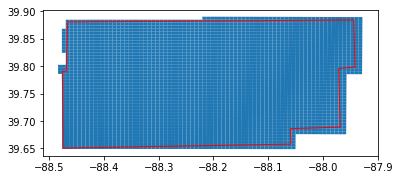

DuPage
Index contains 421 LAS files.
Bounds (geographic coordinates) = [-88.26709333  41.68291834 -87.9058703   41.99917121]
Native Projections = [ '+proj=tmerc +lat_0=36.66666666666666 +lon_0=-88.33333333333333 +k=0.9999749999999999 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


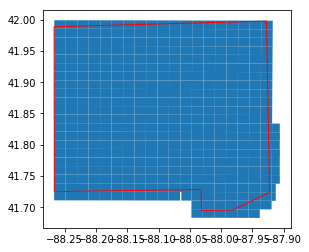

Edgar
Index contains 4684 LAS files.
Bounds (geographic coordinates) = [-87.97892447  39.47133185 -87.52166274  39.8934763 ]
Native Projections = ['EPSG:3443']


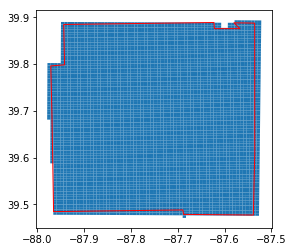

Edwards
Index contains 1826 LAS files.
Bounds (geographic coordinates) = [-88.16008503  38.2480561  -87.92863242  38.5779503 ]
Native Projections = ['EPSG:3443']


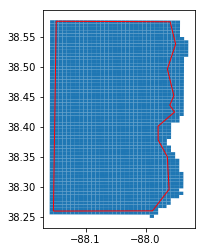

Effingham
Index contains 3741 LAS files.
Bounds (geographic coordinates) = [-88.82016173  38.9010688  -88.34826708  39.22597428]
Native Projections = ['EPSG:3443']


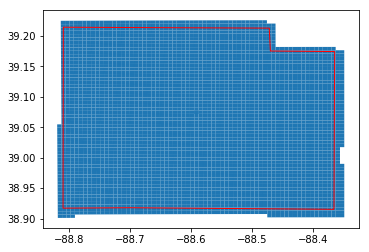

Fayette
Index contains 5458 LAS files.
Bounds (geographic coordinates) = [-89.26316419  38.73366594 -88.68518403  39.22881388]
Native Projections = ['EPSG:3443']


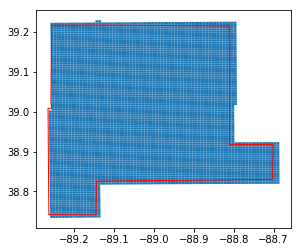

Ford
Index contains 3620 LAS files.
Bounds (geographic coordinates) = [-88.46391523  40.39481769 -87.92441657  41.00480116]
Native Projections = ['EPSG:6455']


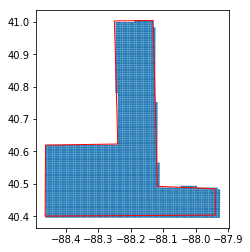

Franklin
Index contains 565 LAS files.
Bounds (geographic coordinates) = [-89.1977707   37.84472709 -88.69436703  38.1354242 ]
Native Projections = [ '+proj=tmerc +lat_0=36.6666666666667 +lon_0=-88.3333333333333 +k=0.9999749999999999 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


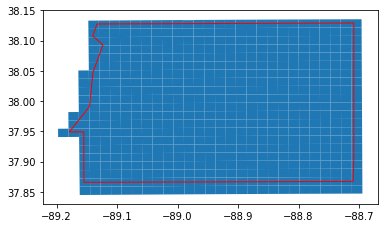

Fulton
Index contains 6550 LAS files.
Bounds (geographic coordinates) = [-90.46302505  40.18143566 -89.85911546  40.72501092]
Native Projections = ['EPSG:3444']


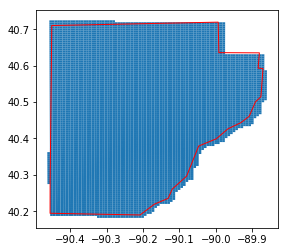

Gallatin
Index contains 397 LAS files.
Bounds (geographic coordinates) = [-88.38788036  37.57717395 -88.01948271  37.928623  ]
Native Projections = ['EPSG:26916']


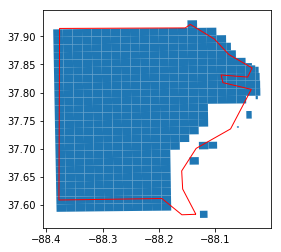

Greene
Index contains 4086 LAS files.
Bounds (geographic coordinates) = [-90.62870557  39.11546785 -90.14043645  39.52815818]
Native Projections = ['EPSG:6457']


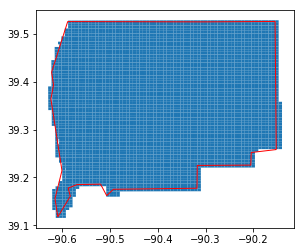

Grundy
Index contains 3145 LAS files.
Bounds (geographic coordinates) = [-88.59719792  41.10735665 -88.23968043  41.46323513]
Native Projections = ['EPSG:6455']


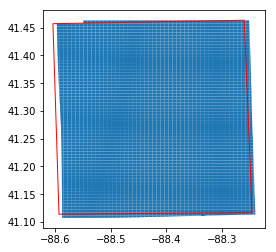

Hamilton
Index contains 567 LAS files.
Bounds (geographic coordinates) = [-88.70849077  37.89466201 -88.35351385  38.25839494]
Native Projections = ['EPSG:26916']


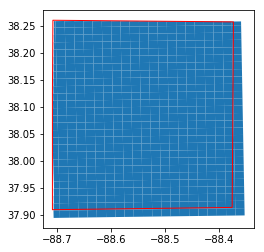

Hancock
Index contains 6021 LAS files.
Bounds (geographic coordinates) = [-91.51571773  40.18798156 -90.89552902  40.6458979 ]
Native Projections = ['EPSG:6457']


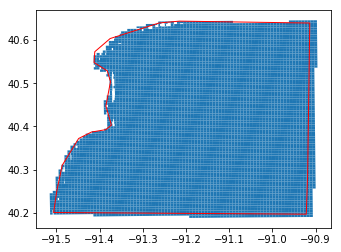

Henderson
Index contains 3046 LAS files.
Bounds (geographic coordinates) = [-91.19939545  40.62453342 -90.76758669  41.08026842]
Native Projections = ['EPSG:3444']


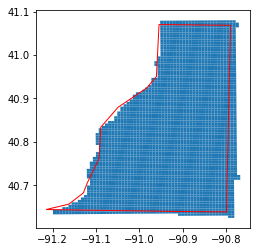

Henry
Index contains 6027 LAS files.
Bounds (geographic coordinates) = [-90.44607794  41.14894395 -89.85439502  41.59239011]
Native Projections = ['EPSG:3444']


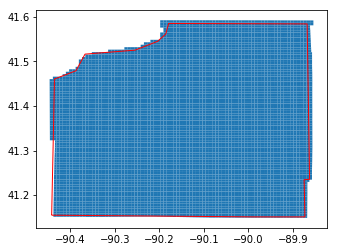

Jackson
Index contains 807 LAS files.
Bounds (geographic coordinates) = [-89.70495344  37.54339589 -89.11805884  37.95632817]
Native Projections = [ '+proj=tmerc +lat_0=36.6666666666667 +lon_0=-90.1666666666667 +k=0.999941176470588 +x_0=699999.9999999993 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


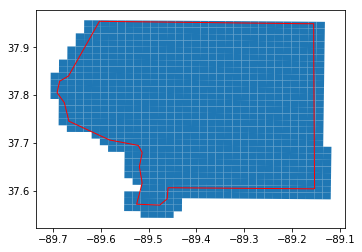

Jasper
Index contains 3828 LAS files.
Bounds (geographic coordinates) = [-88.37645072  38.8360413  -87.93265202  39.18211902]
Native Projections = ['EPSG:3443']


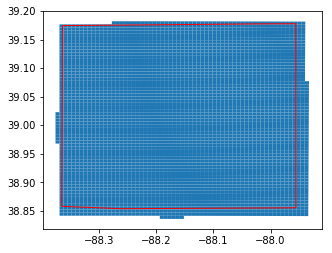

Jefferson
Index contains 632 LAS files.
Bounds (geographic coordinates) = [ 745961.24  529200.    881760.    661200.  ]
Native Projections = ['EPSG:4326']


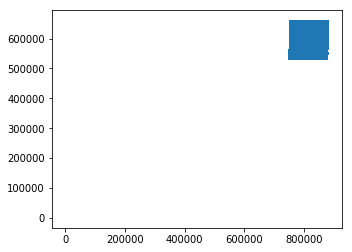

Jersey
Index contains 287 LAS files.
Bounds (geographic coordinates) = [  706000.001  4310000.002   747208.052  4349773.618]
Native Projections = ['EPSG:4326']


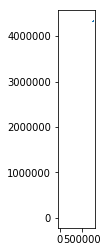

Jo Daviess
Index contains 4547 LAS files.
Bounds (geographic coordinates) = [-90.65830087  42.18508239 -89.90959531  42.50897855]
Native Projections = ['EPSG:3444']


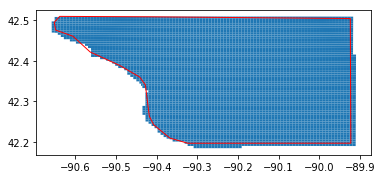

Johnson
Index contains 2006 LAS files.
Bounds (geographic coordinates) = [-89.05143729  37.29072274 -88.69876022  37.61079187]
Native Projections = ['EPSG:26916' 'EPSG:3443']


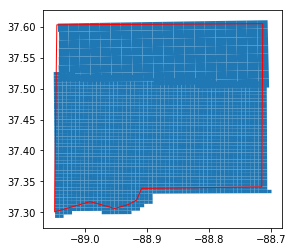

Kane
Index contains 3879 LAS files.
Bounds (geographic coordinates) = [-88.60462209  41.71818187 -88.23097943  42.16303112]
Native Projections = ['EPSG:3443']


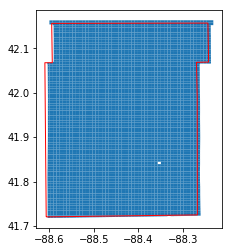

Kankakee
Index contains 3380 LAS files.
Bounds (geographic coordinates) = [-88.26118401  40.98865696 -87.51469651  41.31018991]
Native Projections = [ '+proj=tmerc +lat_0=36.6666666666667 +lon_0=-88.3333333333333 +k=0.9999749999999999 +x_0=300000.0000000001 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


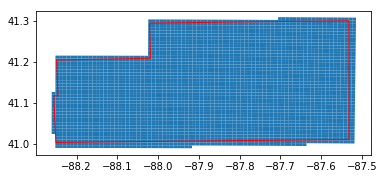

Kendall
Index contains 2364 LAS files.
Bounds (geographic coordinates) = [-88.60897691  41.45195476 -88.2508107   41.72557336]
Native Projections = ['EPSG:6455']


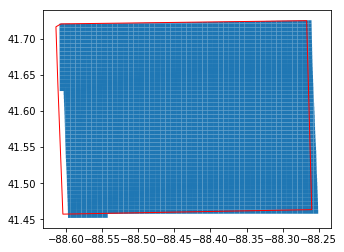

Knox
Index contains 5414 LAS files.
Bounds (geographic coordinates) = [-90.45764965  40.70294359 -89.97269071  41.15844167]
Native Projections = ['EPSG:3444']


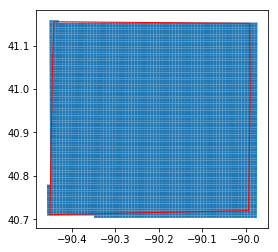

Lake
Index contains 494 LAS files.
Bounds (geographic coordinates) = [-88.20229957  42.15051365 -87.75011265  42.49749008]
Native Projections = ['EPSG:3443']


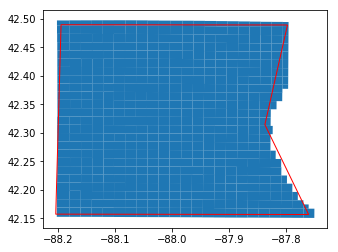

La Salle
Index contains 8241 LAS files.
Bounds (geographic coordinates) = [-89.16834154  40.92484319 -88.5853928   41.63228706]
Native Projections = ['EPSG:6455']


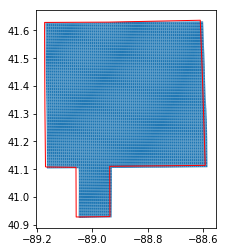

Lawrence
Index contains 2901 LAS files.
Bounds (geographic coordinates) = [-87.92151457  38.56496984 -87.48515188  38.85741628]
Native Projections = ['EPSG:3443']


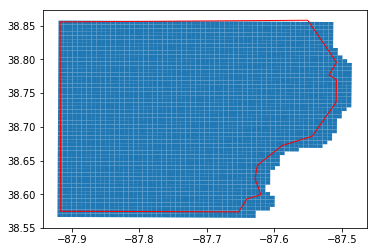

Lee
Index contains 5421 LAS files.
Bounds (geographic coordinates) = [-89.64245051  41.5791935  -88.93146615  41.91969897]
Native Projections = ['EPSG:3444']


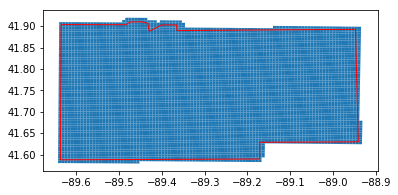

Logan
Index contains 690 LAS files.
Bounds (geographic coordinates) = [-89.6046744   39.91591068 -89.14198906  40.32607231]
Native Projections = [ '+proj=tmerc +lat_0=36.6666666666667 +lon_0=-90.1666666666667 +k=0.999941176470588 +x_0=699999.9999999993 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


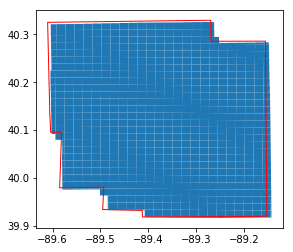

Macon
Index contains 4374 LAS files.
Bounds (geographic coordinates) = [-89.22553823  39.64127621 -88.73275504  40.0599231 ]
Native Projections = ['EPSG:3443']


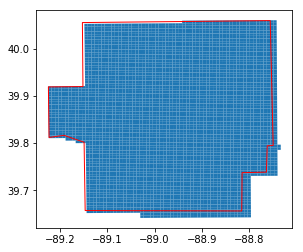

Macoupin
Index contains 6305 LAS files.
Bounds (geographic coordinates) = [-90.15464495  38.99456628 -89.69367484  39.52815757]
Native Projections = ['EPSG:6457']


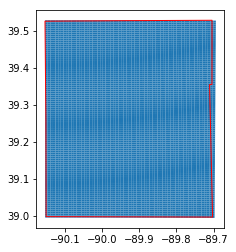

Marshall
Index contains 3112 LAS files.
Bounds (geographic coordinates) = [-89.65433276  40.91361626 -89.03964927  41.15759839]
Native Projections = ['EPSG:3444']


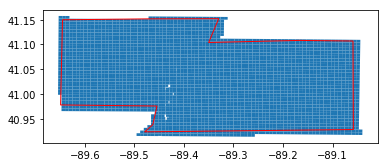

McDonough
Index contains 4399 LAS files.
Bounds (geographic coordinates) = [-90.91834275  40.26903008 -90.43425153  40.64656934]
Native Projections = ['EPSG:3444']


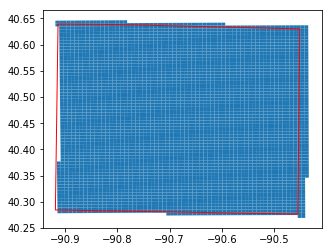

McHenry
Index contains 4459 LAS files.
Bounds (geographic coordinates) = [-88.70981511  42.14627839 -88.19671957  42.49646798]
Native Projections = ['EPSG:3443']


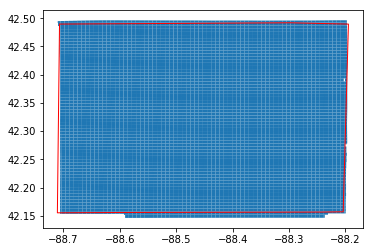

McLean
Index contains 8807 LAS files.
Bounds (geographic coordinates) = [-89.27773406  40.27186748 -88.44891226  40.76310597]
Native Projections = ['EPSG:3443']


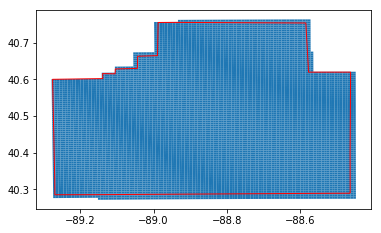

Mercer
Index contains 4208 LAS files.
Bounds (geographic coordinates) = [-91.12165979  41.05381974 -90.42984868  41.33766452]
Native Projections = ['EPSG:3444']


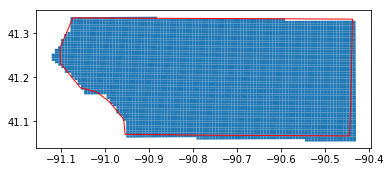

Monroe
Index contains 510 LAS files.
Bounds (geographic coordinates) = [-90.37973632  38.08110322 -89.8933552   38.53417241]
Native Projections = ['EPSG:3531']


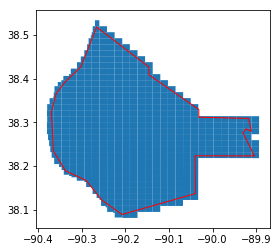

Montgomery
Index contains 5326 LAS files.
Bounds (geographic coordinates) = [-89.7106087   38.99402368 -89.12903141  39.53240949]
Native Projections = ['EPSG:6457']


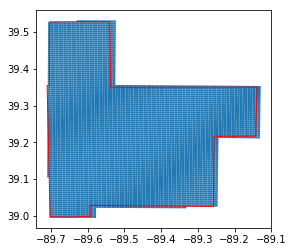

Moultrie
Index contains 2800 LAS files.
Bounds (geographic coordinates) = [-88.82499504  39.43442047 -88.45459259  39.80188118]
Native Projections = ['EPSG:3443']


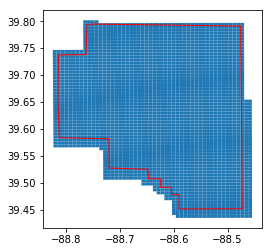

Ogle
Index contains 5680 LAS files.
Bounds (geographic coordinates) = [-89.69842529  41.8752852  -88.9340618   42.21142496]
Native Projections = ['EPSG:3444']


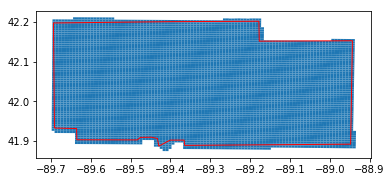

Peoria
Index contains 4857 LAS files.
Bounds (geographic coordinates) = [-90.00307171  40.49960574 -89.43721711  40.9829516 ]
Native Projections = ['EPSG:3444']


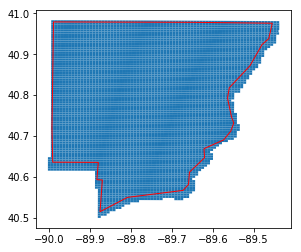

Perry
Index contains 615 LAS files.
Bounds (geographic coordinates) = [-89.63465744  37.93925017 -89.0946243   38.24458119]
Native Projections = [ '+proj=tmerc +lat_0=36.6666666666667 +lon_0=-90.1666666666667 +k=0.999941176470588 +x_0=699999.9999999993 +y_0=0 +ellps=GRS80 +units=us-ft +vunits=us-ft +no_defs ']


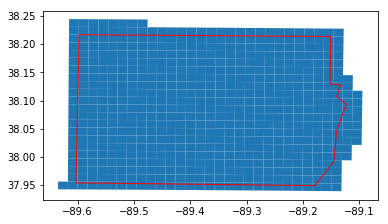

Piatt
Index contains 3406 LAS files.
Bounds (geographic coordinates) = [-88.75609364  39.78596156 -88.44809046  40.29117104]
Native Projections = ['EPSG:3443']


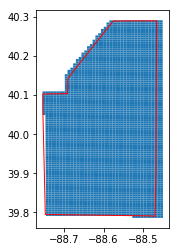

Pulaski
Index contains 1625 LAS files.
Bounds (geographic coordinates) = [-89.28091472  37.06462411 -88.91822955  37.34568837]
Native Projections = ['EPSG:3443']


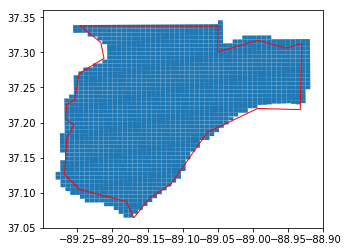

Putnam
Index contains 1370 LAS files.
Bounds (geographic coordinates) = [-89.47896009  41.0938997  -89.15266483  41.32544399]
Native Projections = ['EPSG:3444']


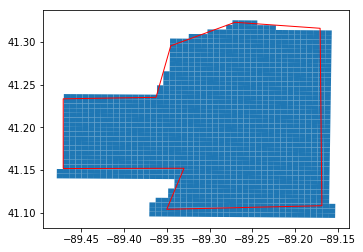

Randolph
Index contains 803 LAS files.
Bounds (geographic coordinates) = [-90.20552135  37.78712271 -89.58813797  38.23182957]
Native Projections = ['EPSG:3531']


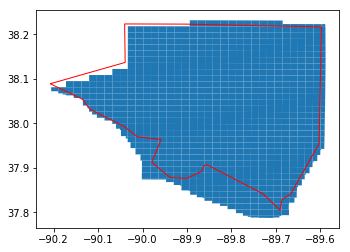

Richland
Index contains 3085 LAS files.
Bounds (geographic coordinates) = [-88.31320772  38.55528712 -87.89171527  38.86362301]
Native Projections = ['EPSG:3443']


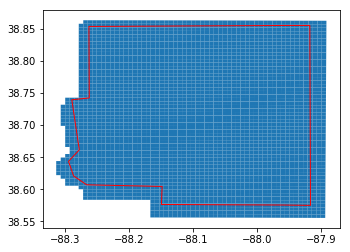

Rock Island
Index contains 3479 LAS files.
Bounds (geographic coordinates) = [-91.07916891  41.31762359 -90.14684717  41.78997026]
Native Projections = ['EPSG:3444']


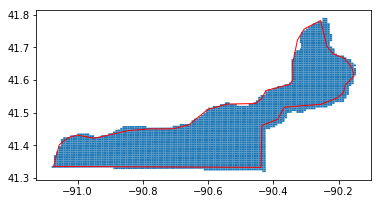

Saline
Index contains 482 LAS files.
Bounds (geographic coordinates) = [-88.7246257   37.58542087 -88.36484902  37.91256612]
Native Projections = ['EPSG:26916']


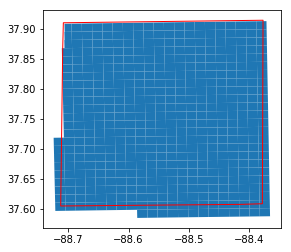

Shelby
Index contains 5787 LAS files.
Bounds (geographic coordinates) = [-89.15311632  39.20400127 -88.45419509  39.66396886]
Native Projections = ['EPSG:3443']


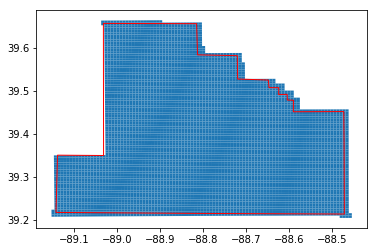

Stark
Index contains 2217 LAS files.
Bounds (geographic coordinates) = [-89.99496489  40.96534129 -89.62408878  41.23521397]
Native Projections = ['EPSG:3444']


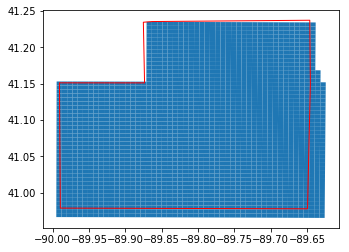

St. Clair
Index contains 785 LAS files.
Bounds (geographic coordinates) = [-90.26169965  38.23121676 -89.69925414  38.66405555]
Native Projections = ['EPSG:3531']


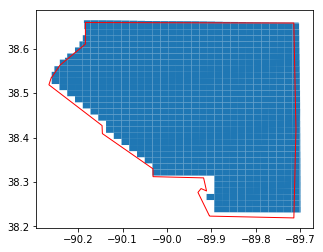

Stephenson
Index contains 4195 LAS files.
Bounds (geographic coordinates) = [-89.9392413   42.18943845 -89.38633707  42.50875199]
Native Projections = ['EPSG:3444']


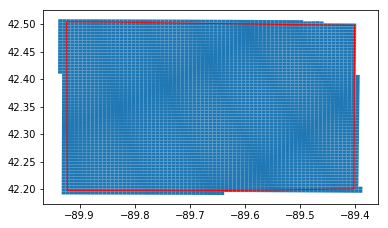

Tazewell
Index contains 4935 LAS files.
Bounds (geographic coordinates) = [-89.96041974  40.31667982 -89.25723092  40.75645788]
Native Projections = ['EPSG:3444']


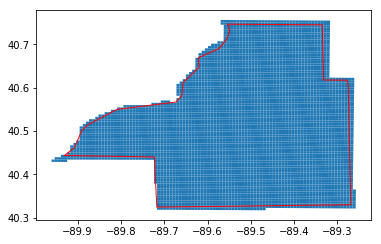

Union
Index contains 319 LAS files.
Bounds (geographic coordinates) = [  806000.     4136000.      850467.45   4168448.298]
Native Projections = ['EPSG:4326']


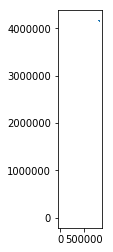

Vermilion
Index contains 6790 LAS files.
Bounds (geographic coordinates) = [-87.95513965  39.86034773 -87.51443066  40.49779025]
Native Projections = ['EPSG:3443']


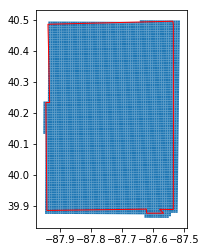

Wabash
Index contains 1963 LAS files.
Bounds (geographic coordinates) = [-87.99989755  38.23147227 -87.62764201  38.57749516]
Native Projections = ['EPSG:3443']


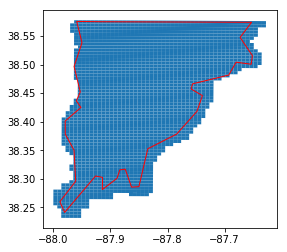

Warren
Index contains 4186 LAS files.
Bounds (geographic coordinates) = [-90.80381484  40.61991192 -90.42871915  41.08026842]
Native Projections = ['EPSG:3444']


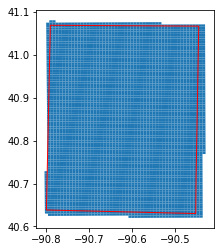

Wayne
Index contains 5271 LAS files.
Bounds (geographic coordinates) = [-88.70518768  38.25347879 -88.13824757  38.61637835]
Native Projections = ['EPSG:3443']


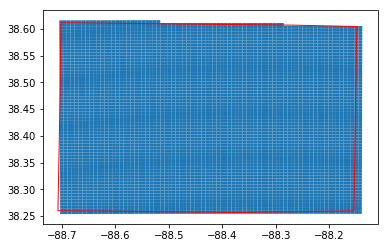

White
Index contains 657 LAS files.
Bounds (geographic coordinates) = [-88.39068427  37.88823534 -87.91321927  38.26254063]
Native Projections = ['EPSG:26916']


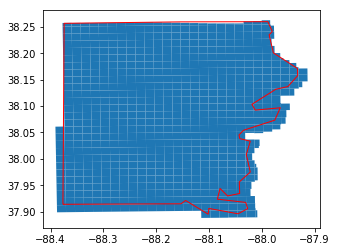

Whiteside
Index contains 5280 LAS files.
Bounds (geographic coordinates) = [-90.25681477  41.57551933 -89.61748706  41.93818614]
Native Projections = ['EPSG:3444']


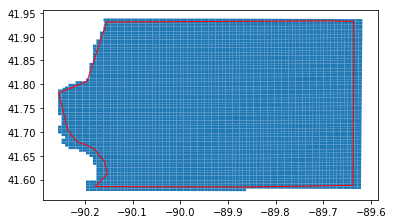

Williamson
Index contains 569 LAS files.
Bounds (geographic coordinates) = [-89.1562333   37.5918814  -88.68784473  37.86780305]
Native Projections = ['EPSG:26916']


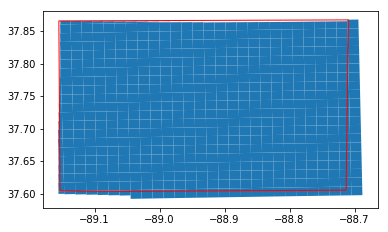

Winnebago
Index contains 3865 LAS files.
Bounds (geographic coordinates) = [-89.4074945   42.1456522  -88.93022093  42.5064465 ]
Native Projections = ['EPSG:6457']


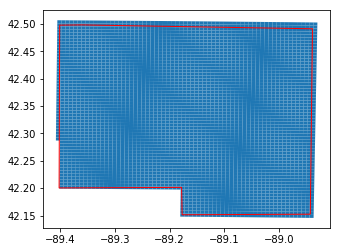

Woodford
Index contains 4131 LAS files.
Bounds (geographic coordinates) = [-89.5766359   40.58426972 -88.92376315  40.93568533]
Native Projections = ['EPSG:3444']


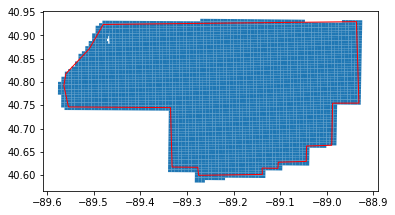

In [36]:
#fig, axs = plt.subplots(5, 1, figsize=(5,5))
for county in counties: 
    
    # attempts to read the uncorrected LAS tile index for demonstration purposes
    gpkg = os.path.join(lidar_path, county, 'tiles.gpkg.orig')
    if not os.path.exists(gpkg):
        gpkg = os.path.join(lidar_path, county, 'tiles.gpkg')
        if not os.path.exists(gpkg):
            print(IL.loc[IL['name']==county, 'NAME'].values[0], 'does not have a tile index.')
            continue

    tindex = gpd.read_file(gpkg)

    # basic statistics
    print(IL.loc[IL['name']==county, 'NAME'].values[0])
    print(f'Index contains {len(tindex)} LAS files.')
    print(f'Bounds (geographic coordinates) = {tindex.total_bounds}')
    print(f"Native Projections = {tindex['srs'].unique()}")
    
    # tile index plot
    ax = tindex.plot()
    IL[IL['name']==county].plot(ax=ax, facecolor='none', edgecolor='red')
    plt.show()